In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
import tensorflow as tf
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# path to images
path = 'Dataset/train/'

# animal categories
categories = ['happy','sad'] 

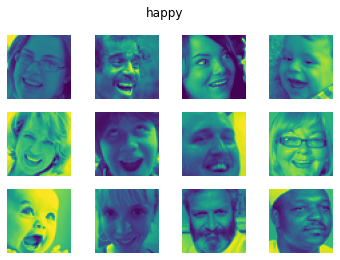

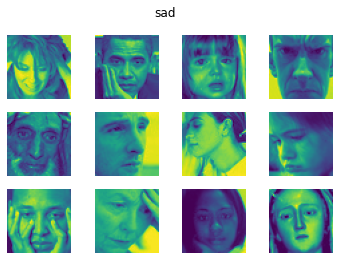

In [2]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [3]:
shape0 = []# height of image
shape1 = []# width of image

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

happy  => height min :  48 width min :  48
happy  => height max :  48 width max :  48
sad  => height min :  48 width min :  48
sad  => height max :  48 width max :  48


In [4]:
# initialize the data and labels
data = [] # append all images (resize)
labels = []  # append the category /label of image
imagePaths = []   # append the path of each image 
HEIGHT = 48
WIDTH = 48
N_CHANNELS = 2

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

print(imagePaths[:10])
import random
random.shuffle(imagePaths)
print(imagePaths[:10])


[['Dataset/train/happy/Training_10019449.jpg', 0], ['Dataset/train/happy/Training_10046809.jpg', 0], ['Dataset/train/happy/Training_10066226.jpg', 0], ['Dataset/train/happy/Training_10070997.jpg', 0], ['Dataset/train/happy/Training_10080933.jpg', 0], ['Dataset/train/happy/Training_10109375.jpg', 0], ['Dataset/train/happy/Training_10116721.jpg', 0], ['Dataset/train/happy/Training_10127474.jpg', 0], ['Dataset/train/happy/Training_10133389.jpg', 0], ['Dataset/train/happy/Training_10139297.jpg', 0]]
[['Dataset/train/happy/Training_89183894.jpg', 0], ['Dataset/train/happy/Training_54583631.jpg', 0], ['Dataset/train/happy/Training_39890129.jpg', 0], ['Dataset/train/happy/Training_8652202.jpg', 0], ['Dataset/train/sad/Training_57785790.jpg', 1], ['Dataset/train/happy/Training_14078248(1).jpg', 0], ['Dataset/train/happy/Training_21634001.jpg', 0], ['Dataset/train/happy/Training_64383479.jpg', 0], ['Dataset/train/happy/Training_4222047.jpg', 0], ['Dataset/train/happy/Training_70055728.jpg', 0]]

In [5]:
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

In [6]:
data[0]

array([[[ 47,  47,  47],
        [ 43,  43,  43],
        [ 43,  43,  43],
        ...,
        [ 36,  36,  36],
        [ 38,  38,  38],
        [ 49,  49,  49]],

       [[ 52,  52,  52],
        [ 43,  43,  43],
        [ 42,  42,  42],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 26,  26,  26]],

       [[ 49,  49,  49],
        [ 43,  43,  43],
        [ 44,  44,  44],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 24,  24,  24]],

       ...,

       [[226, 226, 226],
        [223, 223, 223],
        [222, 222, 222],
        ...,
        [157, 157, 157],
        [163, 163, 163],
        [171, 171, 171]],

       [[223, 223, 223],
        [224, 224, 224],
        [223, 223, 223],
        ...,
        [155, 155, 155],
        [161, 161, 161],
        [161, 161, 161]],

       [[223, 223, 223],
        [225, 225, 225],
        [222, 222, 222],
        ...,
        [149, 149, 149],
        [157, 157, 157],
        [158, 158, 158]]

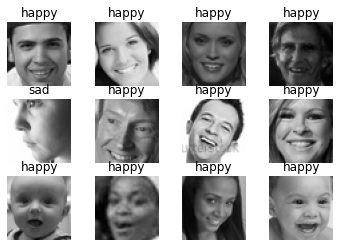

In [7]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0   # independent features
labels = np.array(labels)     # dependent features
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [8]:
data[0]
len(data)
data.shape

(12107, 48, 48, 3)

In [9]:
labels

array([0, 0, 0, ..., 0, 0, 1])

In [10]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
# Preprocess class labels
print(trainY)
trainY = np_utils.to_categorical(trainY, 2)  # actual y 

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
trainY

[1 0 0 ... 1 0 1]
(9685, 48, 48, 3)
(2422, 48, 48, 3)
(9685, 2)
(2422,)


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [11]:
model = Sequential()
model.add(Convolution2D(48,kernel_size=3, activation='relu', input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(48, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   # max value access from 2,2 matrix
#model.add(Dropout(0.25))
model.add(Flatten()) # to convert array of image  into 1D
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 48)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 48)        20784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4800)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 9602      
Total params: 31,730
Trainable params: 31,730
Non-trainable params: 0
____________________________________________________

In [12]:
model.fit(data,labels, batch_size=8, epochs=30, verbose=1)

Epoch 1/30
1514/1514 [==============================] - 125s 82ms/step - loss: 0.5764 - accuracy: 0.6864
Epoch 2/30
1514/1514 [==============================] - 124s 82ms/step - loss: 0.4738 - accuracy: 0.7709s - loss: 0.4
Epoch 3/30
1514/1514 [==============================] - 171s 113ms/step - loss: 0.4249 - accuracy: 0.7976
Epoch 4/30
1514/1514 [==============================] - 130s 86ms/step - loss: 0.3921 - accuracy: 0.8192s -
Epoch 5/30
1514/1514 [==============================] - 129s 85ms/step - loss: 0.3649 - accuracy: 0.8332
Epoch 6/30
1514/1514 [==============================] - 171s 113ms/step - loss: 0.3432 - accuracy: 0.8424
Epoch 7/30
1514/1514 [==============================] - 166s 110ms/step - loss: 0.3197 - accuracy: 0.8566
Epoch 8/30
1514/1514 [==============================] - 153s 101ms/step - loss: 0.3035 - accuracy: 0.8666
Epoch 9/30
1514/1514 [==============================] - 139s 92ms/step - loss: 0.2834 - accuracy: 0.8754
Epoch 10/30
1514/1514 [============

In [13]:
from keras.models import load_model
model.save("network.h5")
loaded_model = load_model("network.h5")
loss, accuracy = loaded_model.evaluate(testX, testY)

76/76 [==============================] - 6s 75ms/step - loss: 0.0702 - accuracy: 0.9761


<ipython-input-14-3634f539fb91>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
<ipython-input-14-3634f539fb91>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


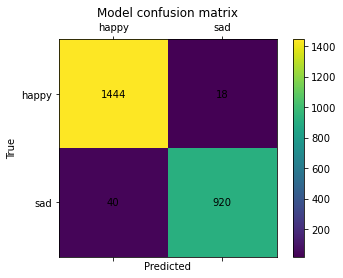

Accuracy : 97.61%


In [14]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = loaded_model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

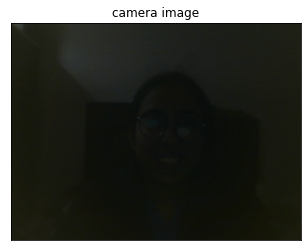

In [15]:
import cv2
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(0)
if cap.isOpened():
 ret, frame = cap.read()
else:
 ret = False
img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("camera image")
plt.xticks([])
plt.yticks([])
plt.show()
cap.release()

In [16]:
cv2.imwrite("filename.jpg",img) #save image

True

In [17]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (48, 48, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('filename.jpg')


In [18]:
predictions = loaded_model.predict(image)
predictions

array([[0.6316602 , 0.36833978]], dtype=float32)

In [19]:
predict = loaded_model.predict_classes(image)
predict

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0], dtype=int64)

In [20]:
predict=list(predict)
predict

[0]

In [21]:
for i in predict:
    predict_1=i
predict_1

0

In [22]:
type(predict_1)

numpy.int64

In [23]:
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to happy with a 56.55 percent confidence.


In [24]:
import numpy

flag=0
if predict_1 == 1:
              flag+=1


In [25]:
import multiprocessing
from playsound import playsound

if flag==0:
        p = multiprocessing.Process(target=playsound, args=("Cheap Thrills.mp3",))
        p.start()
else: 
    p = multiprocessing.Process(target=playsound, args=("128-Tu Jaane Na - Ajab Prem Ki Ghazab Kahani 128 Kbps.mp3",))
    p.start()
    
input("press ENTER to stop playback")
p.terminate()  

press ENTER to stop playback
